In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BMW_Sales_Data.csv")

In [3]:
data.head()

,Date,Model,Revenue,Quantity Sold,Region,Country,Channel,Engine Type,Cost,Payment Method
0,1/1/2019,BMW X2,94654.0,2.0,Africa,Nigeria,Wholesale,Gasoline,35000.0,Bank Transfer
1,1/1/2019,BMW M4,111259.0,1.0,Africa,Kenya,Wholesale,Gasoline,60000.0,Bank Transfer
2,2/1/2019,BMW 6 Series,94881.0,3.0,South America,Chile,Wholesale,Hybrid,55000.0,Bank Transfer
3,4/1/2019,BMW X2,35293.0,4.0,Asia,South Korea,Wholesale,Gasoline,35000.0,Bank Transfer
4,4/1/2019,BMW M2,76275.0,5.0,Asia,Japan,Wholesale,Gasoline,50000.0,Bank Transfer


In [4]:
data.tail()

,Date,Model,Revenue,Quantity Sold,Region,Country,Channel,Engine Type,Cost,Payment Method
5773,31/12/2023,BMW M3,58530.0,1.0,Europe,Spain,Wholesale,NaN,NaN,Bank Transfer
5774,31/12/2023,BMW 4 Series,85902.0,2.0,North America,United States,Online,NaN,NaN,Installments
5775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5776,31/12/2023,BMW 5 Series,113394.0,2.0,South America,Chile,Wholesale,NaN,NaN,Bank Transfer
5777,31/12/2023,BMW 1 Series,73525.0,5.0,Asia,South Korea,Dealership,NaN,NaN,NaN


In [5]:
data.shape

(5778, 10)

In [6]:
data.columns.tolist()

['Date',
 'Model',
 'Revenue',
 'Quantity Sold',
 'Region',
 'Country',
 'Channel',
 'Engine Type',
 'Cost',
 'Payment Method']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5778 entries, 0 to 5777
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5000 non-null   object 
 1   Model           5000 non-null   object 
 2   Revenue         5000 non-null   float64
 3   Quantity Sold   5000 non-null   float64
 4   Region          5000 non-null   object 
 5   Country         5000 non-null   object 
 6   Channel         5000 non-null   object 
 7   Engine Type     1956 non-null   object 
 8   Cost            5000 non-null   float64
 9   Payment Method  3341 non-null   object 
dtypes: float64(3), object(7)
memory usage: 451.5+ KB


In [8]:
data.describe()

,Revenue,Quantity Sold,Cost
count,5000.000000,5000.000000,5000.000000
mean,75213.045000,3.000400,48598.145056
std,26274.843561,1.399854,6935.776509
min,30016.000000,1.000000,30145.000000
25%,52399.000000,2.000000,49021.983640
50%,75036.500000,3.000000,49021.983640
75%,98282.500000,4.000000,49021.983640
max,119998.000000,5.000000,70000.000000


In [9]:
data.describe(include="O")

,Date,Model,Region,Country,Channel,Engine Type,Payment Method
count,5000,5000,5000,5000,5000,1956,3341
unique,1721,26,5,23,3,4,3
top,3/2/2020,BMW Z4,Africa,United States,Wholesale,Gasoline,Bank Transfer
freq,9,223,1091,343,2215,1195,2215


In [10]:
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True, errors="coerce")

In [11]:
data.dtypes

Date              datetime64[ns]
Model                     object
Revenue                  float64
Quantity Sold            float64
Region                    object
Country                   object
Channel                   object
Engine Type               object
Cost                     float64
Payment Method            object
dtype: object

In [12]:
data.isnull().sum()

Date               778
Model              778
Revenue            778
Quantity Sold      778
Region             778
Country            778
Channel            778
Engine Type       3822
Cost               778
Payment Method    2437
dtype: int64

In [13]:
data.dropna(subset=["Date"], inplace=True)

In [14]:
data.isnull().sum()

Date                 0
Model                0
Revenue              0
Quantity Sold        0
Region               0
Country              0
Channel              0
Engine Type       3044
Cost               670
Payment Method    1659
dtype: int64

In [15]:
data["Engine Type"].value_counts()

Engine Type
Gasoline    1195
Hybrid       371
Electric     205
Diesel       185
Name: count, dtype: int64

In [16]:
data["Model"].unique().tolist()

['BMW X2',
 'BMW M4',
 'BMW 6 Series',
 'BMW M2',
 'BMW iX3',
 'BMW 8 Series',
 'BMW 7 Series',
 'BMW i4',
 'BMW X4',
 'BMW M3',
 'BMW X6',
 'BMW 5 Series',
 'BMW M5',
 'BMW X1',
 'BMW 2 Series',
 'BMW X5',
 'BMW M8',
 'BMW iX',
 'BMW i8',
 'BMW i3',
 'BMW Z4',
 'BMW 4 Series',
 'BMW X3',
 'BMW X7',
 'BMW 3 Series',
 'BMW 1 Series']

In [17]:
Gas_model = data["Model"][data["Engine Type"]=="Gasoline"].tolist()

In [18]:
Hyb_model = data["Model"][data["Engine Type"]=="Hybrid"].tolist()

In [19]:
Elc_model = data["Model"][data["Engine Type"]=="Electric"].tolist()

In [20]:
Die_model = data["Model"][data["Engine Type"]=="Diesel"].tolist()

In [21]:
data["Engine Type"].fillna("no value" , inplace=True)

In [22]:
no_Engine = data["Model"][data["Engine Type"]=="no value"].tolist()

In [23]:
for i in no_Engine:
    if i in Gas_model:
        data.loc[(data["Model"] == i) & (data["Engine Type"] == "no value"), "Engine Type"] = "Gasoline"
    elif i in Hyb_model:
        data.loc[(data["Model"] == i) & (data["Engine Type"] == "no value"), "Engine Type"] = "Hybrid"
    elif i in Elc_model:
        data.loc[(data["Model"] == i) & (data["Engine Type"] == "no value"), "Engine Type"] = "Electric"
    elif i in Die_model:
        data.loc[(data["Model"] == i) & (data["Engine Type"] == "no value"), "Engine Type"] = "Diesel"

In [24]:
x = data["Engine Type"][data["Engine Type"]!="no value"]
data["Engine Type"].replace("no value" , x.mode()[0] , inplace=True)

In [25]:
data.isnull().sum()

Date                 0
Model                0
Revenue              0
Quantity Sold        0
Region               0
Country              0
Channel              0
Engine Type          0
Cost               670
Payment Method    1659
dtype: int64

In [26]:
data["Cost"].fillna(data["Cost"].mean() , inplace=True)

In [27]:
data.isnull().sum()

Date                 0
Model                0
Revenue              0
Quantity Sold        0
Region               0
Country              0
Channel              0
Engine Type          0
Cost                 0
Payment Method    1659
dtype: int64

In [28]:
data["Engine Type"].unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'Electric'], dtype=object)

In [29]:
data["Payment Method"].unique()

array(['Bank Transfer', nan, 'Cash', 'Installments'], dtype=object)

In [30]:
data["Channel"].unique()

array(['Wholesale', 'Dealership', 'Online'], dtype=object)

In [31]:
data["Payment Method"].fillna("no value" , inplace = True)

In [32]:
data["Channel"][data["Payment Method"]=="no value"].value_counts()

Channel
Dealership    1659
Name: count, dtype: int64

In [33]:
data["Channel"][data["Payment Method"]=="Installments"].value_counts()

Channel
Online    1121
Name: count, dtype: int64

In [34]:
data["Channel"][data["Payment Method"]=="Bank Transfer"].value_counts()

Channel
Wholesale    2215
Name: count, dtype: int64

In [35]:
data["Channel"][data["Payment Method"]=="Cash"].value_counts()

Channel
Dealership    5
Name: count, dtype: int64

In [36]:
data["Payment Method"].replace("no value" ,"Cash" ,inplace=True)

In [37]:
data.isnull().sum()

Date              0
Model             0
Revenue           0
Quantity Sold     0
Region            0
Country           0
Channel           0
Engine Type       0
Cost              0
Payment Method    0
dtype: int64

In [38]:
data.pivot_table(index="Country" , values="Revenue" , aggfunc="mean")

,Revenue
Country,
Argentina,75846.344660
Brazil,74875.795812
Canada,76158.622581
Chile,75020.004785
China,75396.845411
Colombia,75264.694444
Egypt,73790.940909
France,74787.035928
Germany,77553.377049


In [39]:
data.columns.tolist()

['Date',
 'Model',
 'Revenue',
 'Quantity Sold',
 'Region',
 'Country',
 'Channel',
 'Engine Type',
 'Cost',
 'Payment Method']

In [40]:
data["Gross Revenue"] = data["Revenue"] * data["Quantity Sold"]

In [41]:
data["Total Cost"] = data["Quantity Sold"] * data["Cost"]

In [42]:
data["Net Profit"] = data["Gross Revenue"] - data["Total Cost"]

In [43]:
data["Percentage of Net Profit"] = (data["Net Profit"] / data["Revenue"]) * 100

In [44]:
data.head()

,Date,Model,Revenue,Quantity Sold,Region,Country,Channel,Engine Type,Cost,Payment Method,Gross Revenue,Total Cost,Net Profit,Percentage of Net Profit
0,2019-01-01,BMW X2,94654.0,2.0,Africa,Nigeria,Wholesale,Gasoline,35000.0,Bank Transfer,189308.0,70000.0,119308.0,126.046443
1,2019-01-01,BMW M4,111259.0,1.0,Africa,Kenya,Wholesale,Gasoline,60000.0,Bank Transfer,111259.0,60000.0,51259.0,46.071778
2,2019-01-02,BMW 6 Series,94881.0,3.0,South America,Chile,Wholesale,Hybrid,55000.0,Bank Transfer,284643.0,165000.0,119643.0,126.097954
3,2019-01-04,BMW X2,35293.0,4.0,Asia,South Korea,Wholesale,Gasoline,35000.0,Bank Transfer,141172.0,140000.0,1172.0,3.320772
4,2019-01-04,BMW M2,76275.0,5.0,Asia,Japan,Wholesale,Gasoline,50000.0,Bank Transfer,381375.0,250000.0,131375.0,172.238610


In [45]:
data.columns.tolist()

['Date',
 'Model',
 'Revenue',
 'Quantity Sold',
 'Region',
 'Country',
 'Channel',
 'Engine Type',
 'Cost',
 'Payment Method',
 'Gross Revenue',
 'Total Cost',
 'Net Profit',
 'Percentage of Net Profit']

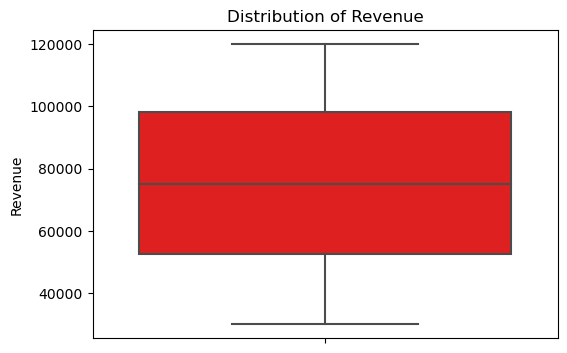

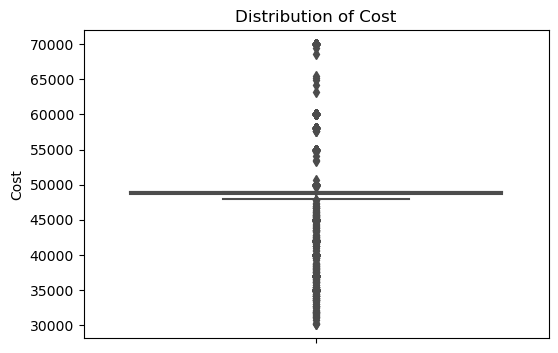

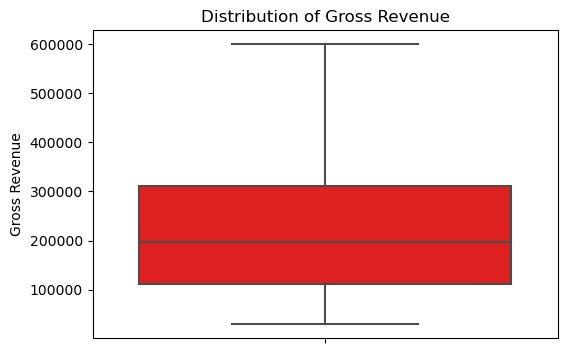

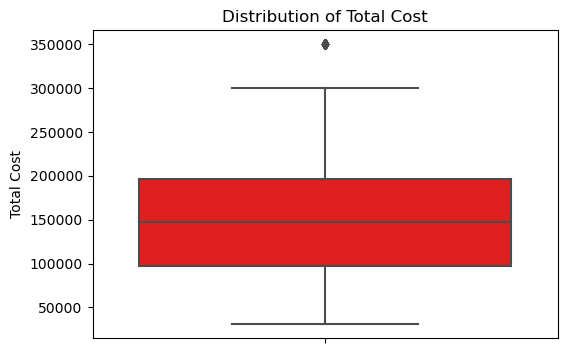

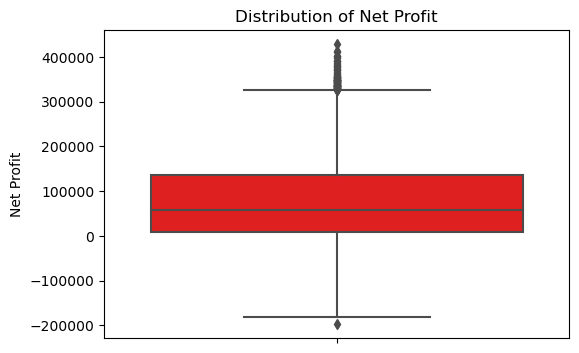

In [46]:
columns = ['Revenue','Cost','Gross Revenue','Total Cost','Net Profit']
for col in columns :
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col], color="red")
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: xlabel='Cost', ylabel='Count'>

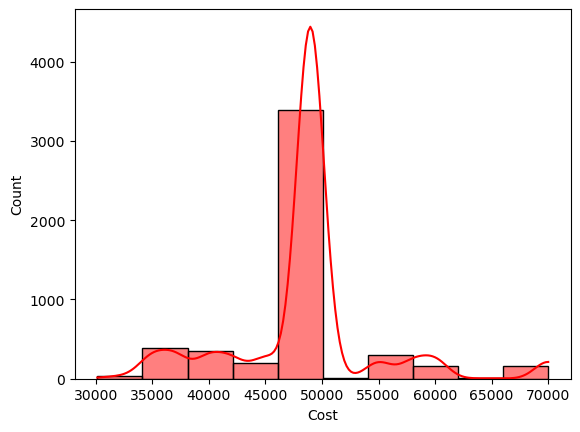

In [47]:
sns.histplot(data["Cost"] , kde=True , color="red" , bins=10)

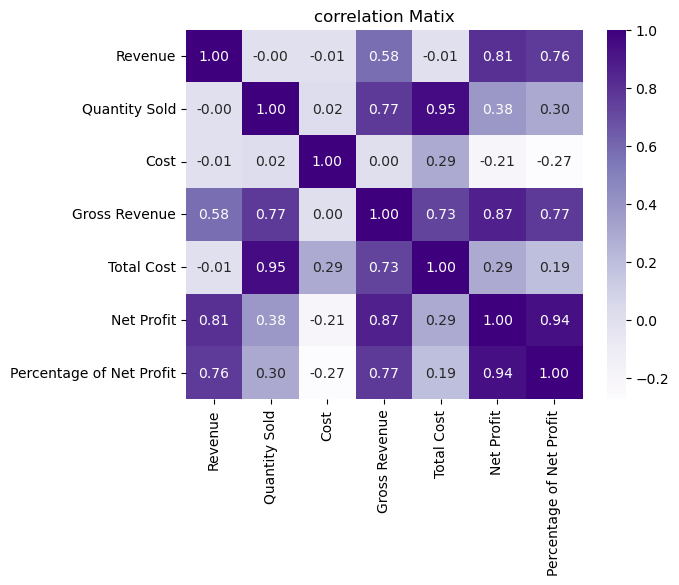

In [48]:
corr_matrix = data.select_dtypes(["int","float64"])
sns.heatmap(corr_matrix.corr(), annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

In [49]:
data.to_excel("Cleaned_BMW_Sales_Data.xlsx", index=False)